In [112]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

df = pd.read_csv("bensin2.csv")
df

,Liter,Penumpang,Bagasi,Kecepatan,RPM,Suhu,Kilometer
0,20,1,0,42,3000,29,142
1,25,2,15,50,4000,36,177
2,20,4,10,50,3000,24,144
3,30,5,25,50,3000,18,203
4,40,1,40,50,3200,30,273
...,...,...,...,...,...,...,...
60,31,3,0,50,3000,30,203
61,37,1,0,50,3000,22,241
62,23,2,10,50,3000,30,142
63,36,2,0,50,3000,20,241


In [113]:
df.describe()

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,26.446154,2.384615,8.538462,49.876923,28.738462,165.307692
std,7.424686,1.558167,13.101857,0.992278,3.378595,68.571113
min,6.000000,1.000000,0.000000,42.000000,18.000000,1.000000
25%,23.000000,1.000000,0.000000,50.000000,29.000000,142.000000
50%,25.000000,2.000000,0.000000,50.000000,30.000000,174.000000
75%,30.000000,4.000000,15.000000,50.000000,30.000000,211.000000
max,45.000000,6.000000,60.000000,50.000000,36.000000,278.000000


In [114]:
df.corr()

,Liter,Penumpang,Bagasi,Kecepatan,Suhu,Kilometer
Liter,1.000000,-0.087997,0.097560,0.109370,0.079470,0.700815
Penumpang,-0.087997,1.000000,0.081542,0.111942,-0.039954,-0.034175
Bagasi,0.097560,0.081542,1.000000,0.082096,-0.049363,-0.023318
Kecepatan,0.109370,0.111942,0.082096,1.000000,-0.009752,0.042819
Suhu,0.079470,-0.039954,-0.049363,-0.009752,1.000000,0.136657
Kilometer,0.700815,-0.034175,-0.023318,0.042819,0.136657,1.000000


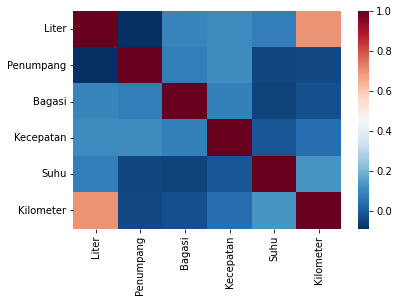

In [124]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap="RdBu_r")

In [117]:
X = df[["Liter","Kecepatan","Suhu"]]
y = df[["Kilometer"]]
X_train,X_test,y_train,y_test = ms.train_test_split(X,y, test_size=0.1,random_state=0)

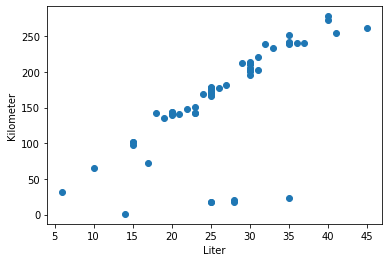

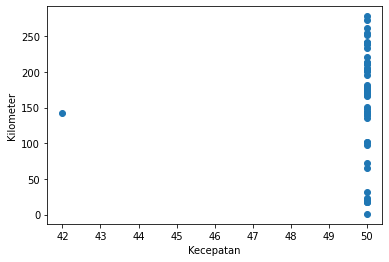

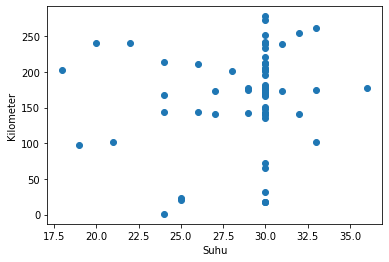

In [118]:
for column in X.columns:
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('Kilometer')
    plt.show()

In [119]:
model = lm.LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [120]:
print("Intercept=", model.intercept_)
print("Slope=", model.coef_)

Intercept= [54.02972826]
Slope= [[ 6.47403914 -2.58466866  2.31191631]]


In [121]:
new_data = np.array([[40, 70, 30]])
predictions = model.predict(new_data)
print(predictions)

[[201.42197643]]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [122]:
r2=model.score(X_test, y_test)
print(r2)

0.7586683563263258
